In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt 
from scipy import signal
from scipy import constants as const
from scipy import fftpack
import copy

In [2]:
def RecWOP(x,a,b):
    
    y = []

    y1 = [1.0/a/2*x[i]+0.5 for i in range(len(x)) if  x[i]<a]
    y.extend(y1)
    y2 = [1  for i in range(len(x)) if x[i]>=a and x[i]<=a+b]
    y.extend(y2)
    y3 = [1.0-1.0/a/2*(x[i]-a-b)  for i in range(len(x)) if x[i]>a+b and x[i]<3*a+b]
    y.extend(y3)
    y4 = [0   for i in range(len(x)) if x[i]>=3*a+b and x[i]<=3*a+2*b]
    y.extend(y4)
    y5 = [1.0/a/2*(x[i]-3*a-2*b) for i in range(len(x)) if x[i]>3*a+2*b and x[i]<=4*a+2*b]
    y.extend(y5)

    return y

def RecW(x,a,b,c):

    Nsp =  int(round(x[-1]*c))
    xsp = np.array((np.array_split(x, Nsp)))
    
    yRec  = []

    for i in range(Nsp):
        yOP = RecWOP(xsp[0],tilt,flat)
        yRec.extend(yOP)
        
    return yRec

In [3]:
def GetSignal(x,a,b,c,t,s):
    ys = RecW(x,a,b,c)
    xf = np.arange(0,len(ys)/s,1.0/s)

    yexp = np.exp(-xf/t)
    fft_exp = fftpack.fft(yexp)
    fft_sig = fftpack.fft(ys)
    
    
    in2 = fft_exp*fft_sig/t/s
    signal =  fftpack.ifft(in2)
    
    return xf, signal.real

In [141]:
samp = 2000 #(Hz)
NET = 300 
tau =0.04 #(s)
tstop = 5. #(s)

""" stimulator part """
#Nsf = 10
stm = np.array([1,2,4,5,10,20,40,50,75,80])
rflat = 1.0
fstm = 80
flat = rflat/fstm/2
tilt = (1-rflat)/4/fstm

gain = []
x = np.arange(0,tstop,1.0/samp)

In [142]:
for i in range(10):
    rflat = 1.0
    fstm = stm[i]
    flat = rflat/fstm/2
    tilt = (1-rflat)/4/fstm
    x, y = GetSignal(x,tilt,flat,fstm,tau,samp)
    print(max(y)-min(y))
    gain.append(max(y)-min(y))

1.0062555674236349
1.0024334938239352
0.9225688083471273
0.8553507040226404
0.5624128168699118
0.3074301636662185
0.1620934859019708
0.1313188287125837
0.08458661954930935
0.08157943215656749


In [143]:
from scipy import optimize

In [144]:
f = stm
g1= np.array(gain)

In [145]:
def func(x,tau,A):
    return  A/np.sqrt(1+(2*const.pi*tau*x)**2)

[0.02424361 1.04675903]


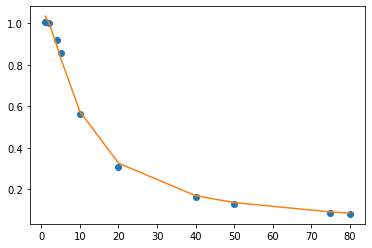

In [146]:
pinit=[0.004, 1]
params,cov = optimize.curve_fit(func, f, g1,pinit)
print(params)
plt.plot(f,g1,'o')
plt.plot(f, func(f,params[0],params[1]))

0.005936792537750742